In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [23]:
# Load the grayscale image of size 512x512
image_path = "./bloom2.jpg"  # Replace with the actual path to your image
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
original_image = cv2.resize(original_image, (512, 512))

In [24]:
def decrease_intensity_resolution(image, number_of_bits):
    step = 255 / (2**number_of_bits - 1) 
    #intensity levels are evenly distributed within the range [0, 255].
    height, width = image.shape
    decreased_image = image.copy()

    for r in range(height):
        for c in range(width):
            #Adjusts the intensity of each pixel in the image to match 
            #the quantized levels based on the calculated step size
            decreased_image[r, c] = round(image[r, c] / step) * step
        
    return np.uint8(decreased_image)

In [31]:
# Load the original image
original_image = cv2.imread("./bloom2.jpg", cv2.IMREAD_GRAYSCALE)

# Create a copy for manipulation
decreased_image = original_image.copy()

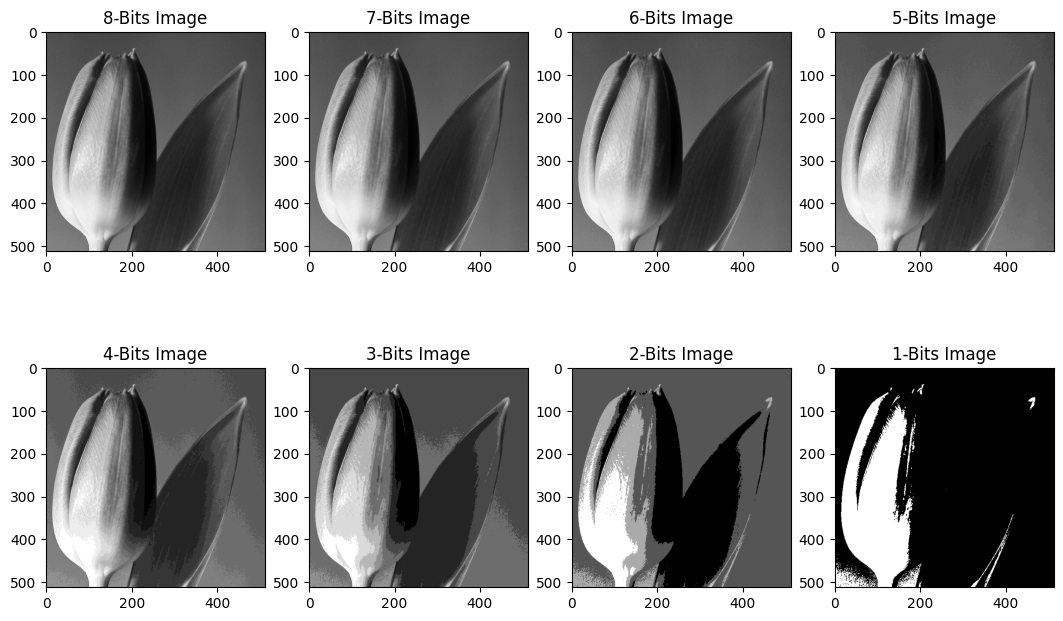

In [32]:
# Plot the images
plt.figure(figsize=(13, 8))

for k in range(1, 9):
    plt.subplot(2, 4, k)
    number_of_bits = 9 - k
    decreased_image = decrease_intensity_resolution(decreased_image, number_of_bits)
    plt.imshow(decreased_image, cmap='gray')
    plt.title(f"{number_of_bits}-Bits Image")
    #colormap

plt.show()